In [256]:
import os
import tarfile
import urllib.request
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [257]:
# Fetch and load data
fetch_housing_data()
housing = load_housing_data()
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


/var/folders/g3/hwwd8nzx1s1g8p458ygp9p500000gn/T/ipykernel_1447/4097391800.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [258]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [259]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [260]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [261]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


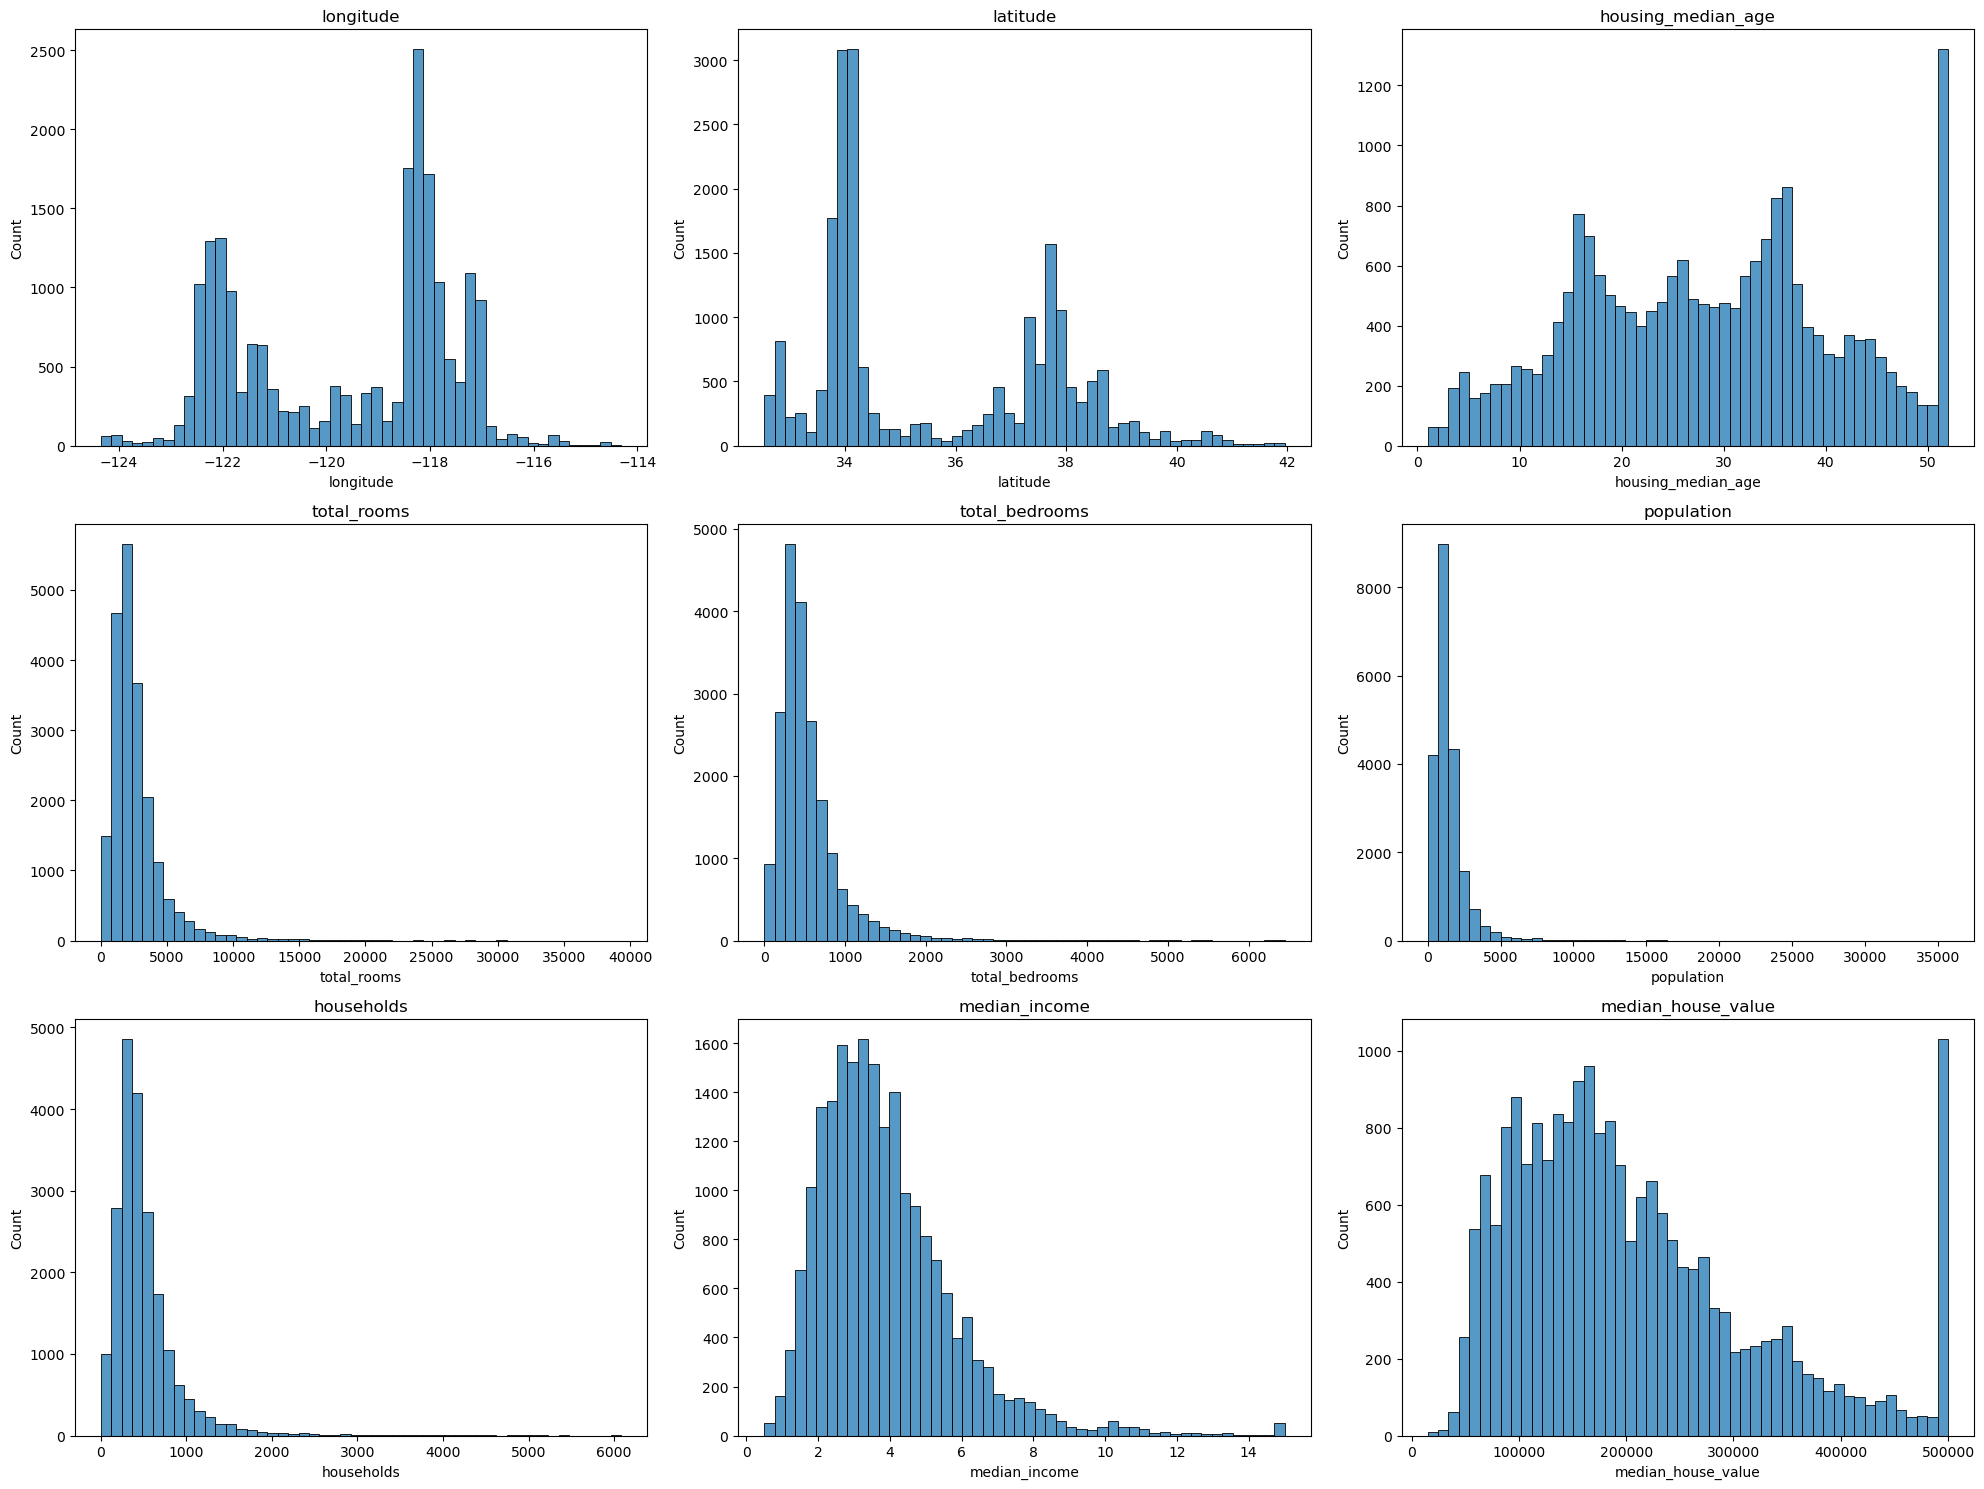

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the first 9 numerical features
numeric_features = housing.select_dtypes(include='number').columns[:9]
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

# Plot histograms using Seaborn
for i, feature in enumerate(numeric_features):
    sns.histplot(housing[feature], bins=50, ax=axes[i], kde=False)
    axes[i].set_title(feature)

# Remove any unused subplots (not necessary here since it's exactly 9, but good practice)
for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [263]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [264]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.0,4.5,6., np.inf], labels=[1,2,3,4,5])

<Axes: >

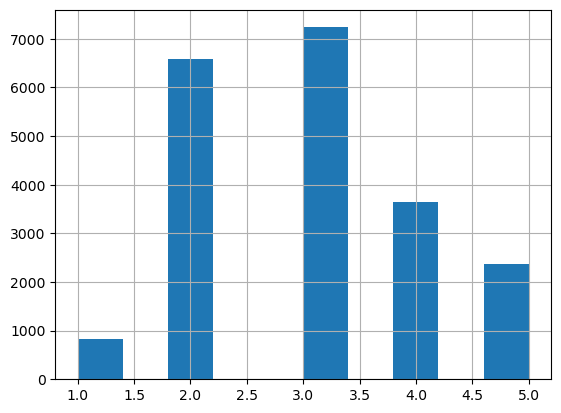

In [265]:
housing["income_cat"].hist()

In [266]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [267]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [268]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

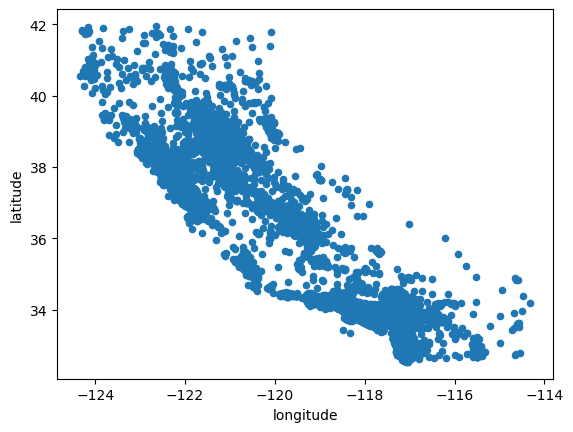

In [269]:
housing.plot(kind="scatter", x="longitude", y="latitude")

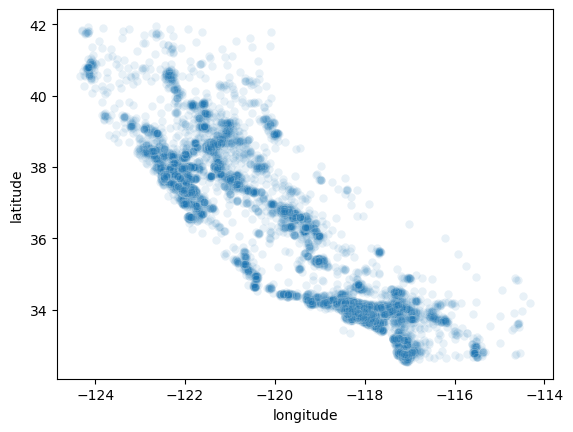

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=housing, x="longitude", y="latitude", alpha=0.1)
plt.show()

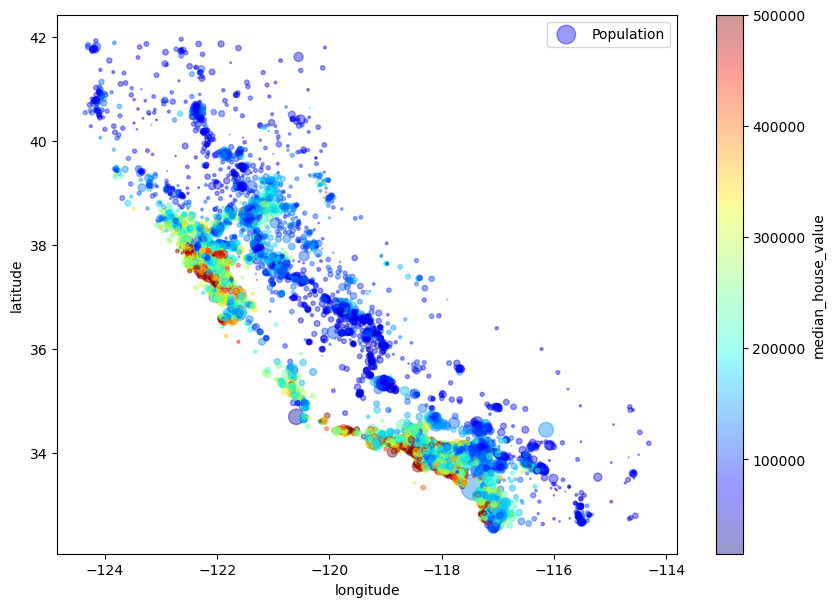

In [271]:
import matplotlib.pyplot as plt

housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,
    label="Population",
    figsize=(10, 7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)

plt.legend()
plt.show()

In [272]:
import pandas as pd

# Assuming 'housing' is your DataFrame
corr_matrix = housing.corr(numeric_only=True)
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_

In [273]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

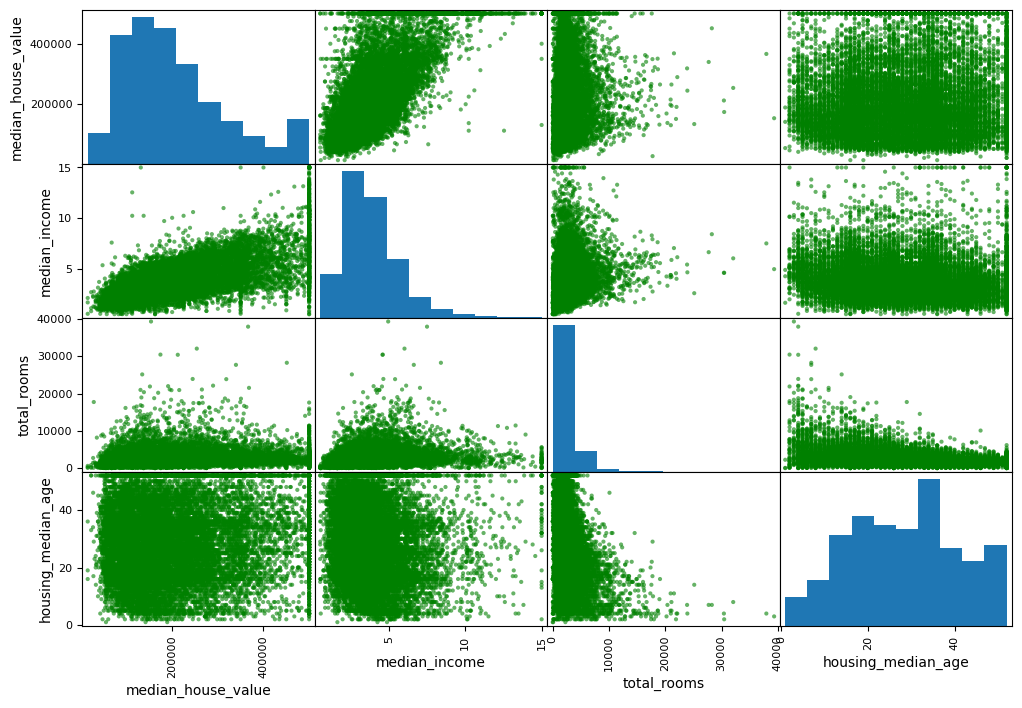

In [274]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(
    housing[attributes],
    figsize=(12, 8),
    diagonal='hist',  # use histogram on the diagonal
    color='green',     # set color for scatter plots
    alpha=0.6          # optional: make points slightly transparent
)

plt.show()

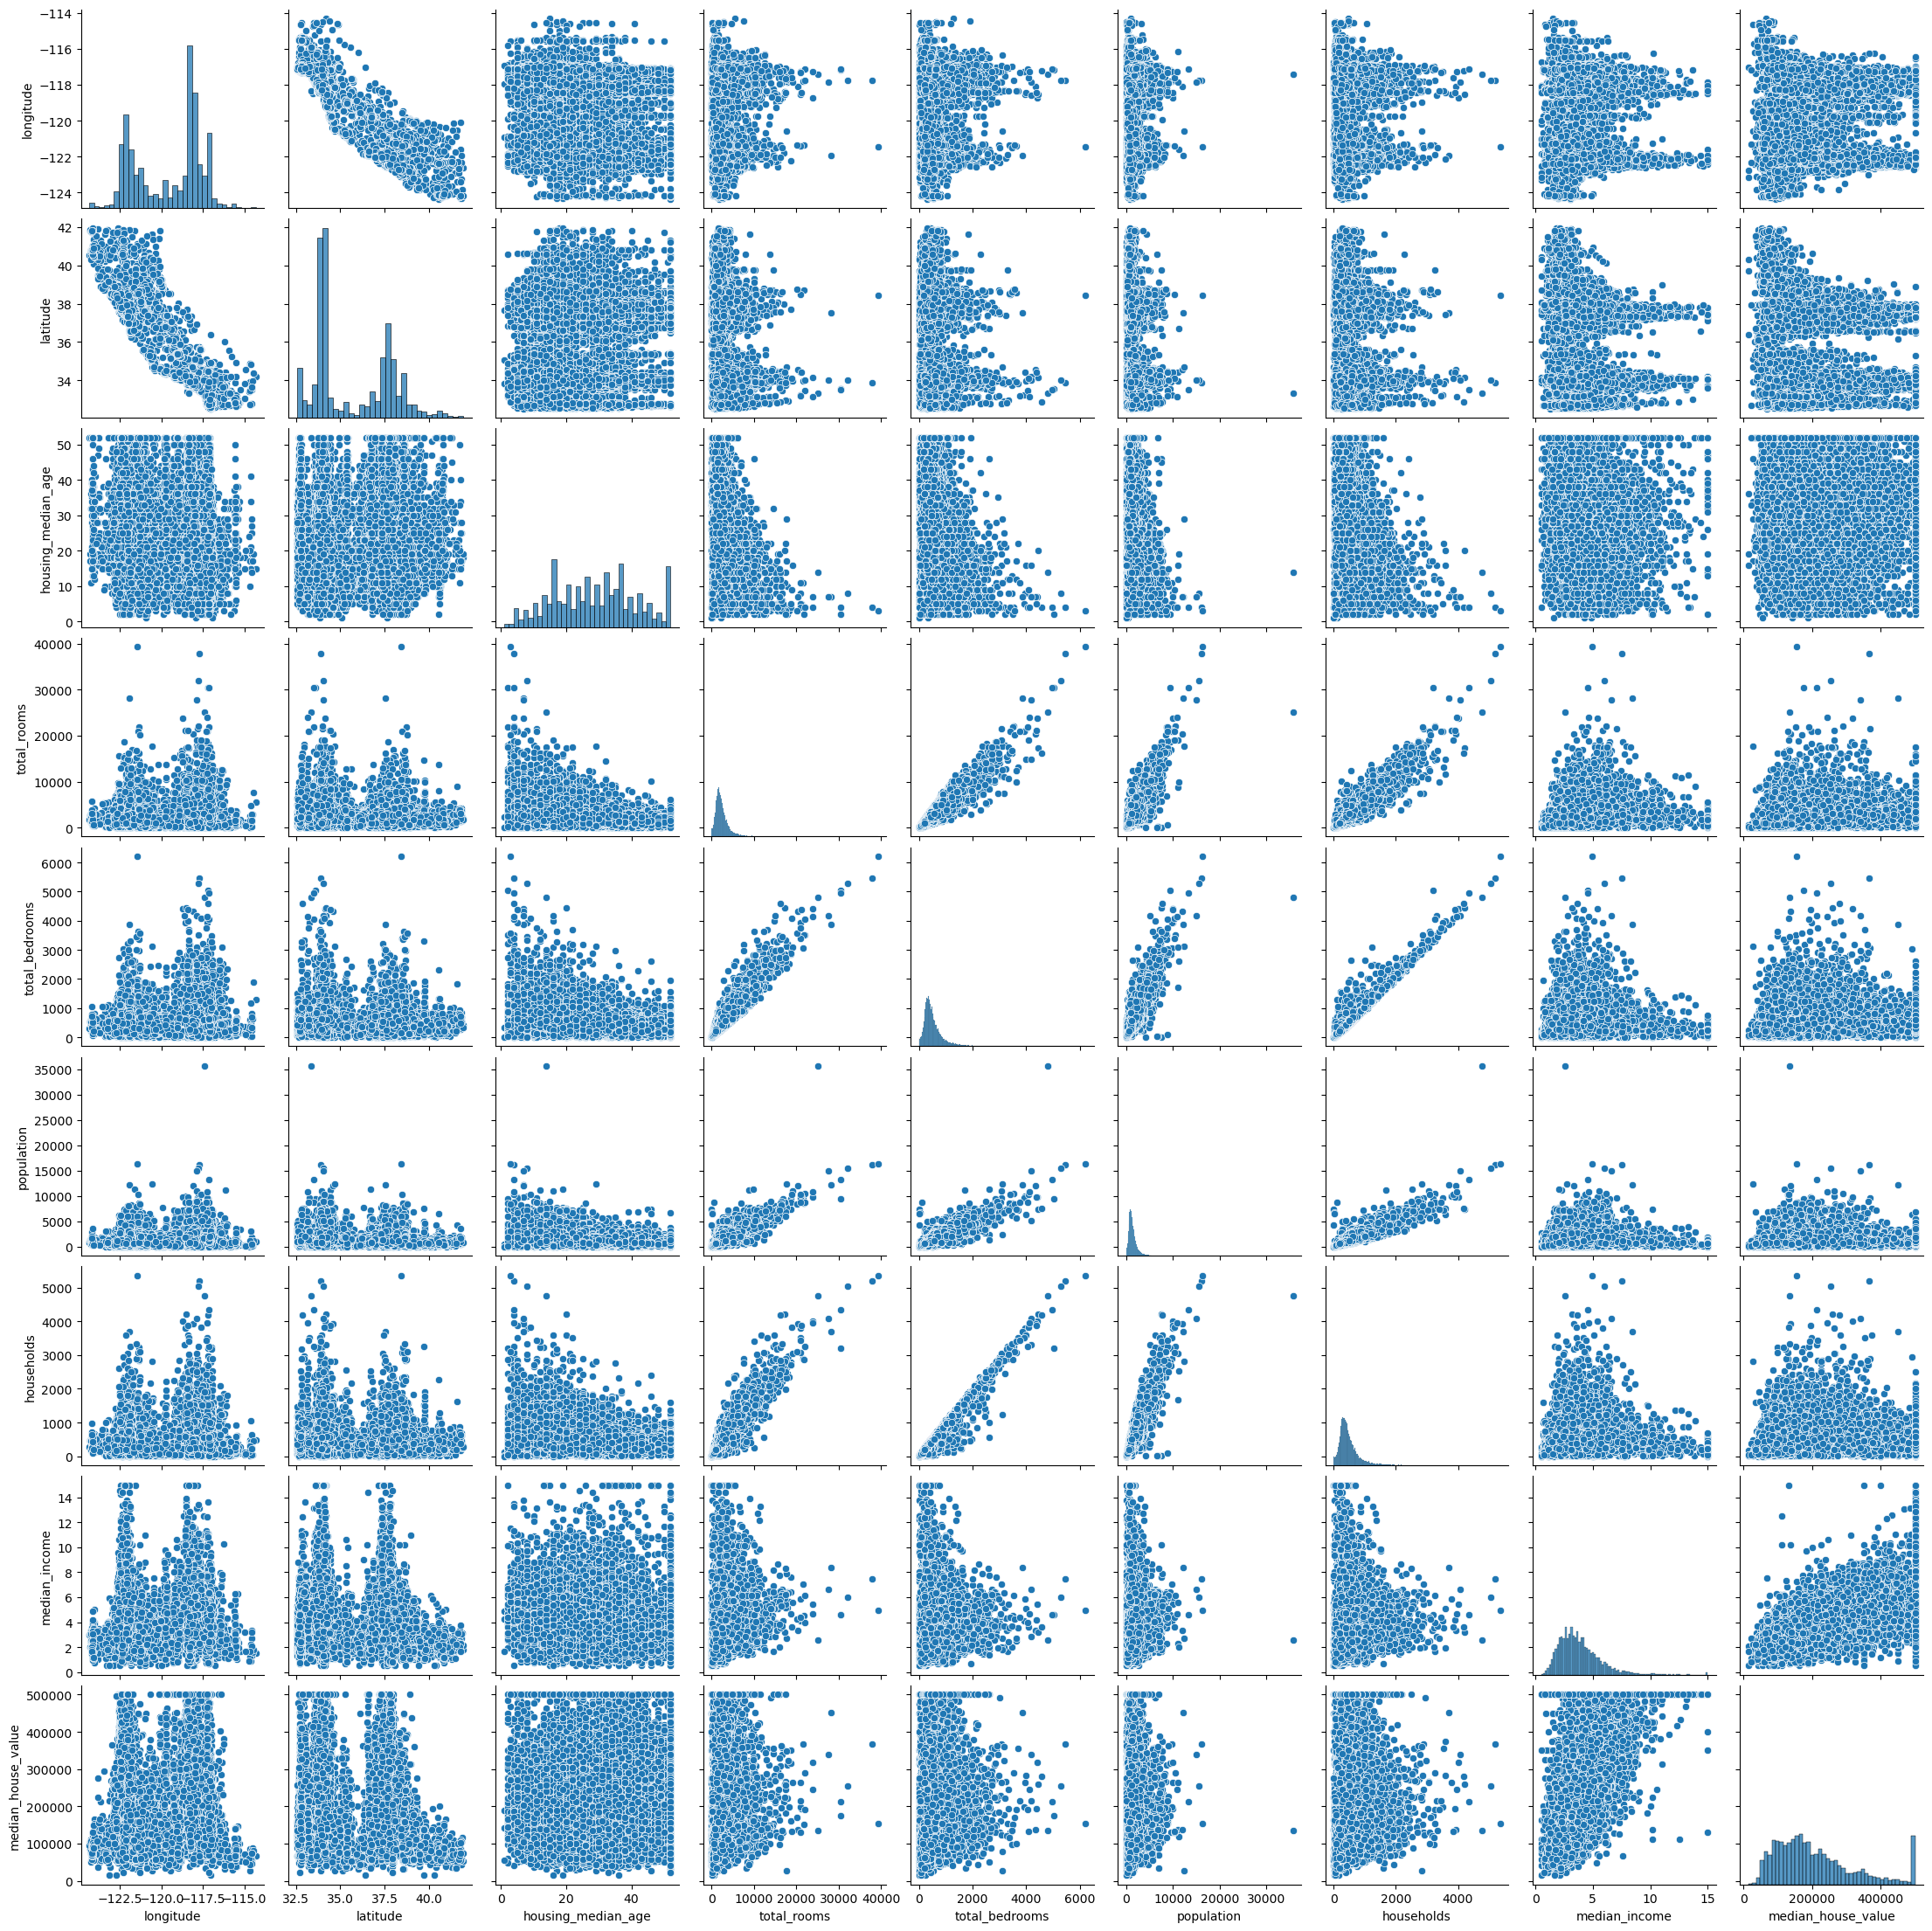

In [275]:
sns.pairplot(housing, height=2.5)
plt.show()

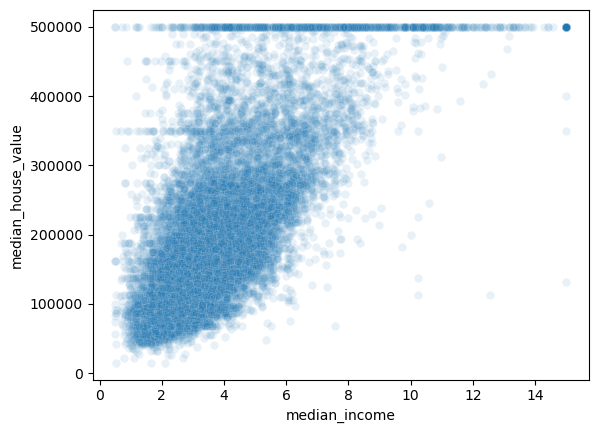

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=housing,
    x="median_income",
    y="median_house_value",
    alpha=0.1
)

plt.show()

In [277]:
housing["room_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [278]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
room_per_household          0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [279]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [249]:
# Option 1: Drop rows where 'total_bedrooms' is missing
housing.dropna(subset=["total_bedrooms"], inplace=True)
# Option 2: Drop the 'total_bedrooms' column entirely
housing.drop("total_bedrooms", axis=1, inplace=True)
# Option 3: Fill missing values in 'total_bedrooms' with the median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [280]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [286]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [287]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [288]:
# Select only numerical columns
housing_num = housing.select_dtypes(include=['number'])

# Now this works correctly
housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [291]:
imputer.fit(housing_num)
X = imputer.transform(housing_num)

In [303]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [304]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: count, dtype: int64

In [305]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [306]:
from sklearn.preprocessing import OneHotEncoder  # Fixed class name

cat_encoder = OneHotEncoder()  # Fixed class name
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [307]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [308]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # fixed constructor name and spacing
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]  # fixed missing X[:, ]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]  # fixed typo p.c_ and variable name

# Usage example:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [309]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [310]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [311]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [312]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [317]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [319]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [320]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [321]:
from sklearn.model_selection import cross_val_score
scores  = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [324]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [73191.75293777 70067.92910126 68796.53891536 72420.23290086
 71982.23721206 77791.42277497 70880.0268139  72652.61461627
 69028.64324093 70803.07011884]
Mean: 71761.44686322089
Standard Deviation: 2459.7885442387624


In [325]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard Deviation: 2880.328209818065


In [331]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:", forest_rmse)

# If you want to display cross-validation scores:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)


RMSE: 18712.0021738687
Scores: [51528.12459896 49303.87474719 46981.62981151 52248.81842714
 47359.28173501 51894.04856789 52421.87196419 49974.92350076
 48348.88633297 54351.28612329]
Mean: 50441.27458089086
Standard deviation: 2304.9303320404924


In [333]:
import joblib

joblib.dump(forest_reg, "my_model.pkl")

#and later
my_model_loaded = joblib.load("my_model.pkl")

['my_model.pkl']

In [335]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'n_estimators':[3,10],'max_features':[2,3,4]}
   
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [336]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [338]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=8, n_estimators=30)


In [339]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64817.85405959472 {'max_features': 2, 'n_estimators': 3}
55370.25467506331 {'max_features': 2, 'n_estimators': 10}
52445.80604991531 {'max_features': 2, 'n_estimators': 30}
61005.055694164315 {'max_features': 4, 'n_estimators': 3}
53249.610013501515 {'max_features': 4, 'n_estimators': 10}
50764.85533713315 {'max_features': 4, 'n_estimators': 30}
59252.36752293354 {'max_features': 6, 'n_estimators': 3}
52277.59051240982 {'max_features': 6, 'n_estimators': 10}
50264.33226246316 {'max_features': 6, 'n_estimators': 30}
58495.22779540985 {'max_features': 8, 'n_estimators': 3}
52528.64251823304 {'max_features': 8, 'n_estimators': 10}
50127.81483369807 {'max_features': 8, 'n_estimators': 30}
62051.233447929175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53753.86929258385 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60403.47731536668 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52133.77663364408 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [341]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
import numpy as np

# Define the model
forest_reg = RandomForestRegressor(random_state=42)

# Define a small parameter distribution for Randomized Search
param_distributions = {
    'n_estimators': randint(10, 100),         # Fewer trees to reduce memory use
    'max_features': randint(2, 8),            # Narrow range
    'max_depth': randint(5, 20)               # Optional: limit tree depth
}


random_search = RandomizedSearchCV(
    estimator=forest_reg,
    param_distributions=param_distributions,
    n_iter=10,                      # Fewer combinations
    cv=3,                           # Fewer CV folds
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=1,                       # Single core to avoid memory crashes
    verbose=2,
    return_train_score=True
)

# Fit the model (use full or reduced data depending on your system)
random_search.fit(housing_prepared, housing_labels)

# Show best parameters and best score
print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
housing_predictions = best_model.predict(housing_prepared)
rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
print("Best RMSE on training set:", rmse)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......max_depth=11, max_features=5, n_estimators=24; total time=   0.7s
[CV] END ......max_depth=11, max_features=5, n_estimators=24; total time=   0.7s
[CV] END ......max_depth=11, max_features=5, n_estimators=24; total time=   0.6s
[CV] END ......max_depth=15, max_features=6, n_estimators=30; total time=   1.3s
[CV] END ......max_depth=15, max_features=6, n_estimators=30; total time=   1.3s
[CV] END ......max_depth=15, max_features=6, n_estimators=30; total time=   1.1s
[CV] END ......max_depth=11, max_features=3, n_estimators=92; total time=   1.5s
[CV] END ......max_depth=11, max_features=3, n_estimators=92; total time=   1.4s
[CV] END ......max_depth=11, max_features=3, n_estimators=92; total time=   1.5s
[CV] END ......max_depth=11, max_features=4, n_estimators=84; total time=   1.8s
[CV] END ......max_depth=11, max_features=4, n_estimators=84; total time=   1.9s
[CV] END ......max_depth=11, max_features=4, n_e

In [342]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.91110814e-02, 6.42885886e-02, 4.20547846e-02, 1.57421361e-02,
       1.50870344e-02, 1.56953144e-02, 1.44747228e-02, 3.88462310e-01,
       4.34547860e-02, 1.12664776e-01, 5.09568131e-02, 7.66382123e-03,
       1.53603442e-01, 8.03295120e-05, 3.16021053e-03, 3.49984900e-03])

In [343]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.388462310108367, 'median_income'),
 (0.15360344224960035, 'INLAND'),
 (0.11266477590291972, 'pop_per_hhold'),
 (0.06911108142581872, 'longitude'),
 (0.06428858860973755, 'latitude'),
 (0.05095681307758385, 'bedrooms_per_room'),
 (0.04345478600138323, 'rooms_per_hhold'),
 (0.04205478461921881, 'housing_median_age'),
 (0.01574213607823969, 'total_rooms'),
 (0.015695314414946364, 'population'),
 (0.015087034442497226, 'total_bedrooms'),
 (0.014474722799715877, 'households'),
 (0.007663821229240162, '<1H OCEAN'),
 (0.0034998489980368514, 'NEAR OCEAN'),
 (0.003160210530741435, 'NEAR BAY'),
 (8.032951195314372e-05, 'ISLAND')]

In [344]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [347]:
from scipy import stats
confidence  = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([46299.54183855, 50333.71686631])